<a href="https://colab.research.google.com/github/latte05/ML_training/blob/master/Digit_Recognition_lightBGM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

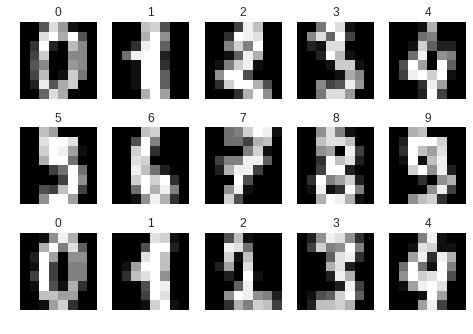

In [1]:
import matplotlib.pyplot as plt
import cv2

from sklearn import datasets
digits = datasets.load_digits()

for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.axis("off")
  plt.title(str(digits.target[i]))
  plt.imshow(digits.images[i], cmap="gray")
  
  
plt.show()

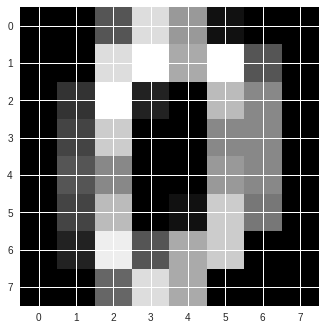

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [2]:
d0 = digits.images[0]
plt.imshow(d0, cmap="gray")
plt.show()
print(d0)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score


#import data
digits = datasets.load_digits()
x = digits.images
y = digits.target

# reshape to one dimentional data
x = x.reshape((-1,64))

# split data to test = 0.2 train = 0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# learning
clf = svm.LinearSVC()
clf.fit(x_train, y_train)

#check accuracy
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9361111111111111


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [9]:
# lightLGB
import lightgbm as lgb
import numpy as np

digits = datasets.load_digits()
x = digits.images
y = digits.target

x = x.reshape((-1,64))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

# LightGBM parameters
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'multiclass',
        'metric': {'multi_logloss'},
        'num_class': 10,
        'learning_rate': 0.1,
        'num_leaves': 23,
        'min_data_in_leaf': 1,
        'num_iteration': 100,
        'verbose': 0
}

# train
gbm = lgb.train(params,
            lgb_train,
            num_boost_round=50,
            valid_sets=lgb_eval,
            early_stopping_rounds=10)
y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)
y_pred = np.argmax(y_pred, axis=1)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:116: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's multi_logloss: 1.91498
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's multi_logloss: 1.66923
[3]	valid_0's multi_logloss: 1.48261
[4]	valid_0's multi_logloss: 1.33752
[5]	valid_0's multi_logloss: 1.216
[6]	valid_0's multi_logloss: 1.11277
[7]	valid_0's multi_logloss: 1.02428
[8]	valid_0's multi_logloss: 0.948703
[9]	valid_0's multi_logloss: 0.882097
[10]	valid_0's multi_logloss: 0.82397
[11]	valid_0's multi_logloss: 0.771681
[12]	valid_0's multi_logloss: 0.72695
[13]	valid_0's multi_logloss: 0.685344
[14]	valid_0's multi_logloss: 0.648659
[15]	valid_0's multi_logloss: 0.616079
[16]	valid_0's multi_logloss: 0.586126
[17]	valid_0's multi_logloss: 0.557481
[18]	valid_0's multi_logloss: 0.530993
[19]	valid_0's multi_logloss: 0.506679
[20]	valid_0's multi_logloss: 0.483722
[21]	valid_0's multi_logloss: 0.464444
[22]	valid_0's multi_logloss: 0.446592
[23]	valid_0's multi_logloss: 0.429728
[24]	valid_0's multi_logloss: 0.414299
[25]	valid_0's multi_l

In [0]:
# save the data
from sklearn.externals import joblib
joblib.dump(clf, 'digits.pkl')
joblib.dump(gbm, 'digits_lgbm.pkl')

clf = joblib.load('digits.pkl')
gbm = joblib.load('digits_lgbm.pkl')

In [0]:
#Free Paint Soft
# http://firealpaca.com/ja

In [11]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving my2.png to my2.png
User uploaded file "my2.png" with length 570 bytes


In [0]:

def predict_digit(filename, pkl):
  clf = joblib.load(pkl)
  my_img = cv2.imread(filename)
  
  my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
  my_img = cv2.resize(my_img, (8,8))
  my_img = 15 - my_img // 16 #flip white to black 
  my_img = my_img.reshape((-1, 64))
  res = clf.predict(my_img)
  return res[0]

In [24]:
n = predict_digit(fn, "digits.pkl")
print("filename:", fn)
print("prediction=", str(n))

filename: my2.png
prediction= 7


In [25]:
# 違う？
n = predict_digit(fn, "digits_lgbm.pkl")
print("filename:", fn)
print("prediction=", str(n))

filename: my2.png
prediction= [0.00095105 0.0009285  0.00088879 0.00096108 0.87223776 0.00089725
 0.00167818 0.11917089 0.00140038 0.00088612]


In [27]:

n = predict_digit("my2.png")
print("my2.png prediction = " + str(n))
n = predict_digit("my4.png")
print("my4.png prediction = " + str(n))

TypeError: ignored